# Entrega 2: Regresión

## Imports

In [4]:
# Scientific computing
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis and manipulation
import pandas as pd

# Mapas
#!pip install folium
import folium
from folium.plugins import HeatMap

# Colormap
import branca.colormap as cm

## Penguins dataset

### Cargamos del dataset

In [5]:
penguins = pd.read_csv('penguins.csv', dtype={'species':'category', 'island': 'category', 'sex':'category'})

In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.2 KB


In [7]:
atributos_categoricos = list(penguins.select_dtypes(include='category').columns)
print(atributos_categoricos)

['species', 'island', 'sex']


In [8]:
atributos_continuos = list(penguins.select_dtypes(include='float').columns)
print(atributos_continuos)

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


### Análisis exploratorio

In [9]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### Análisis univariado

In [10]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [11]:
for col in penguins.select_dtypes(include='category').columns:
    print(col)
    print('----------')
    print(penguins[col].value_counts())
    print('----------')

species
----------
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64
----------
island
----------
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64
----------
sex
----------
MALE      168
FEMALE    165
Name: sex, dtype: int64
----------


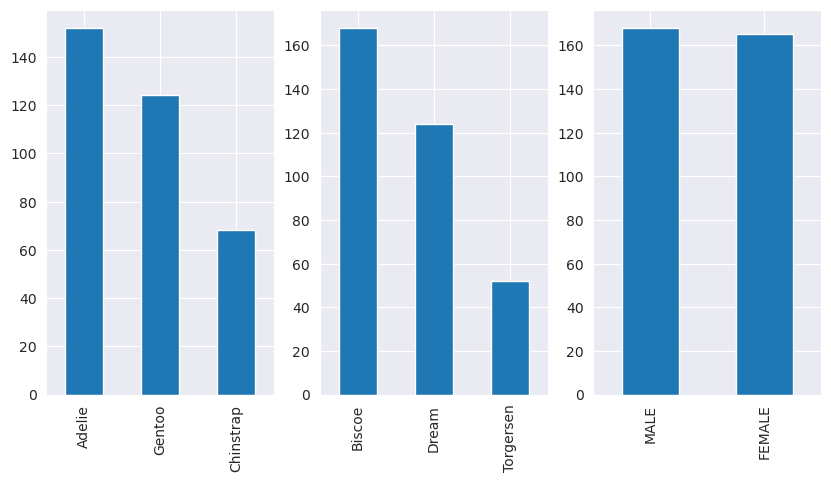

In [12]:
fig, axes = plt.subplots(1,len(atributos_categoricos),figsize=(10,5))

for i, atributo in enumerate(atributos_categoricos):
    penguins[atributo].value_counts().plot(kind='bar', ax=axes[i])

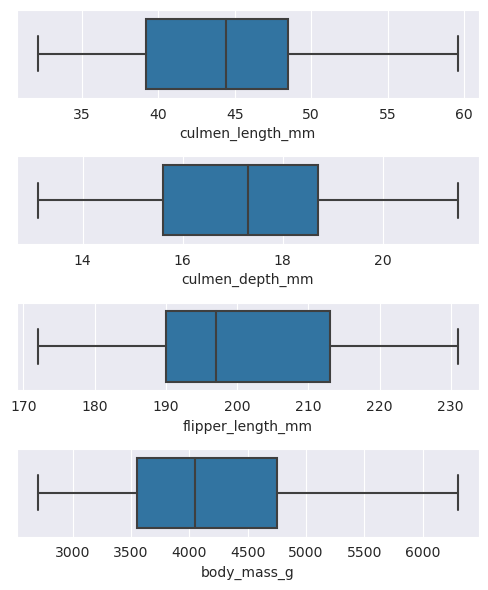

In [13]:
#Boxplots
fig, axes = plt.subplots(len(atributos_continuos),1,figsize=(5,6))

for i, atributo in enumerate(atributos_continuos):
    ax = sns.boxplot(x=atributo, ax=axes[i], data=penguins)
    ax.set_xlabel(atributo)
    
plt.tight_layout()
plt.show()

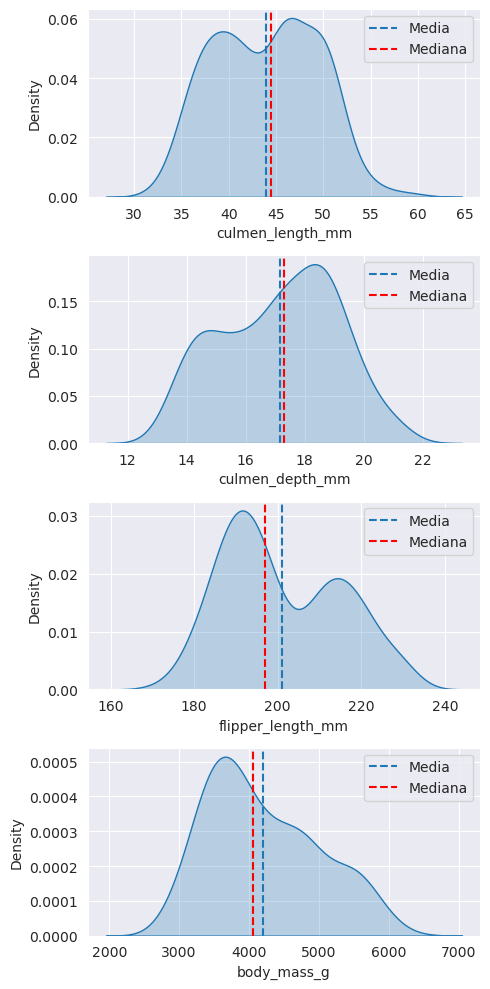

In [14]:
# Densidades
fig, axes = plt.subplots(len(atributos_continuos),1,figsize=(5,10))

for i, atributo in enumerate(atributos_continuos):
    ax = sns.kdeplot(x=atributo, ax=axes[i], data=penguins, fill=True)
    ax.set_xlabel(atributo)
    ax.axvline(x=penguins[atributo].mean(), linestyle='dashed',label='Media')
    ax.axvline(x=penguins[atributo].median(), linestyle='dashed', color='red',label='Mediana')
    ax.legend()
    
plt.tight_layout()
plt.show()

#### Análisis multivariado

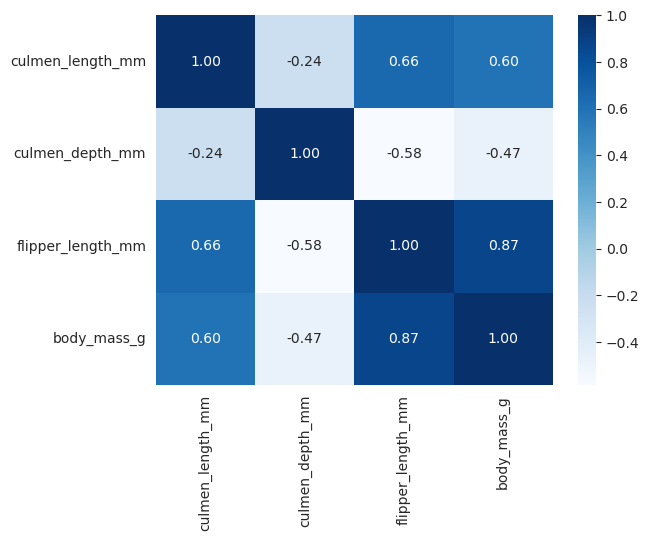

In [17]:
corr = penguins.corr(numeric_only=True)
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f')
plt.show()

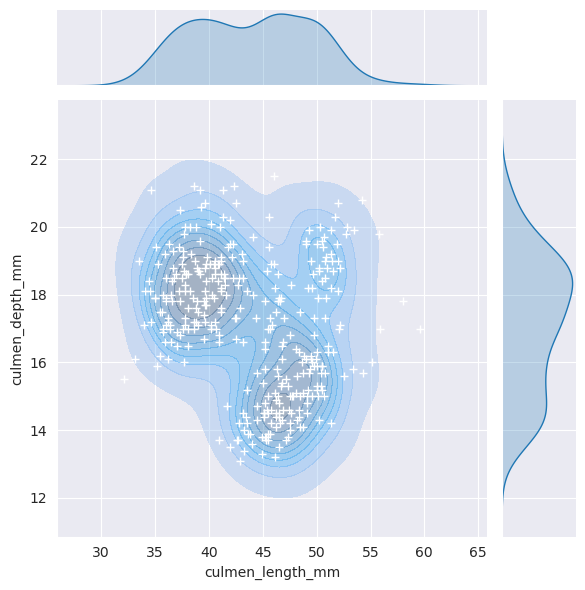

In [18]:
g = sns.jointplot(
    data=penguins,
    x=atributos_continuos[0],
    y=atributos_continuos[1],
    kind="kde",
    fill=True,
    alpha=0.4
)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
plt.show()

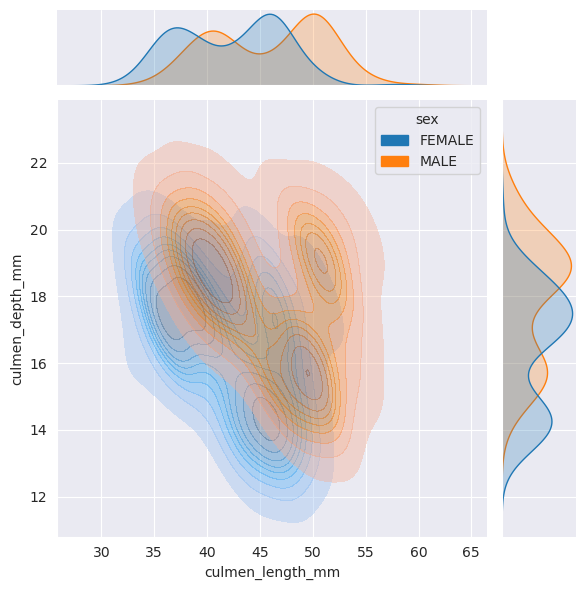

In [19]:
sns.jointplot(
    data=penguins,
    x=atributos_continuos[0],
    y=atributos_continuos[1],
    hue="sex",
    kind="kde",
    fill=True,
    alpha=0.4
)
plt.show()

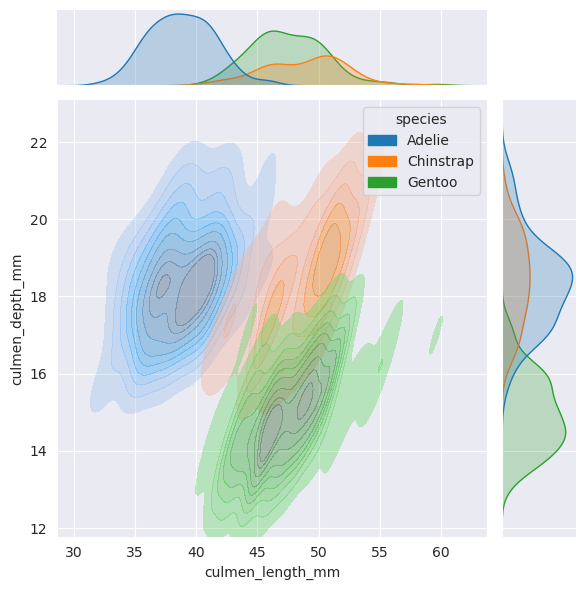

In [20]:
sns.jointplot(
    data=penguins,
    x=atributos_continuos[0],
    y=atributos_continuos[1],
    hue="species",
    kind="kde",
    fill=True,
    alpha=0.4
)
plt.show()

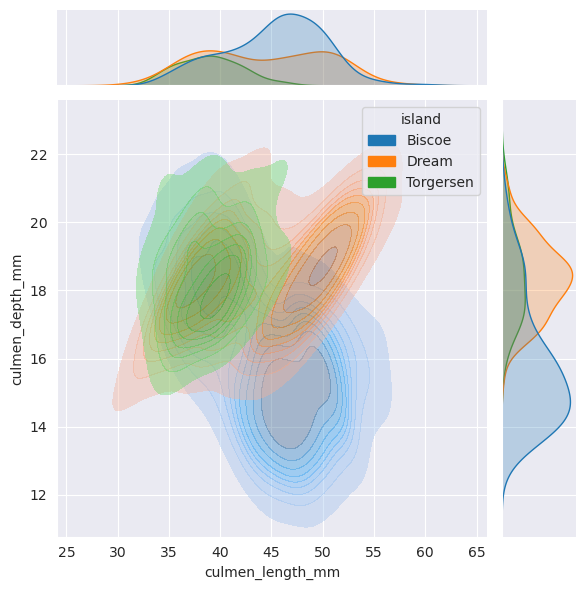

In [21]:
sns.jointplot(
    data=penguins,
    x=atributos_continuos[0],
    y=atributos_continuos[1],
    hue="island",
    kind="kde",
    fill=True,
    alpha=0.4
)
plt.show()

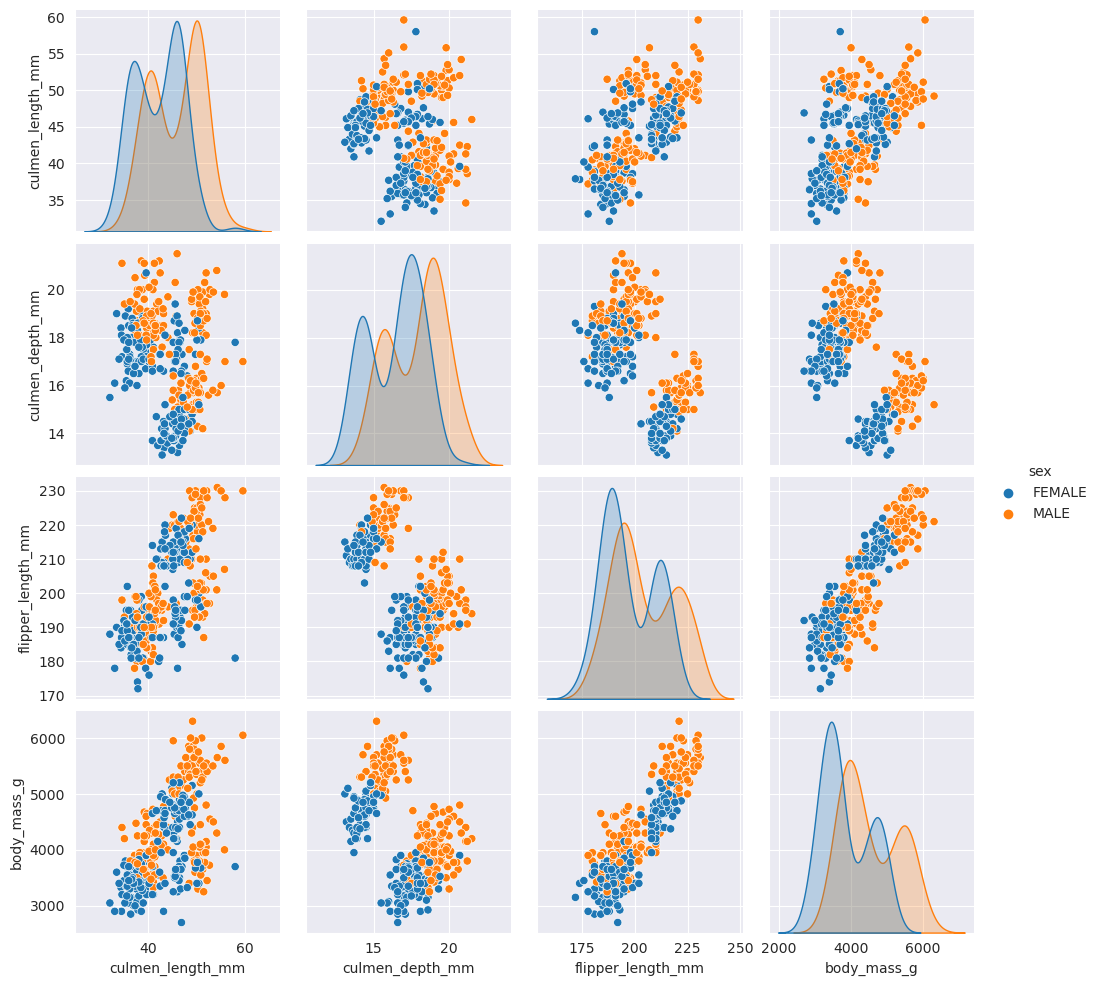

In [22]:
sns.pairplot(penguins, hue="sex")
plt.show()

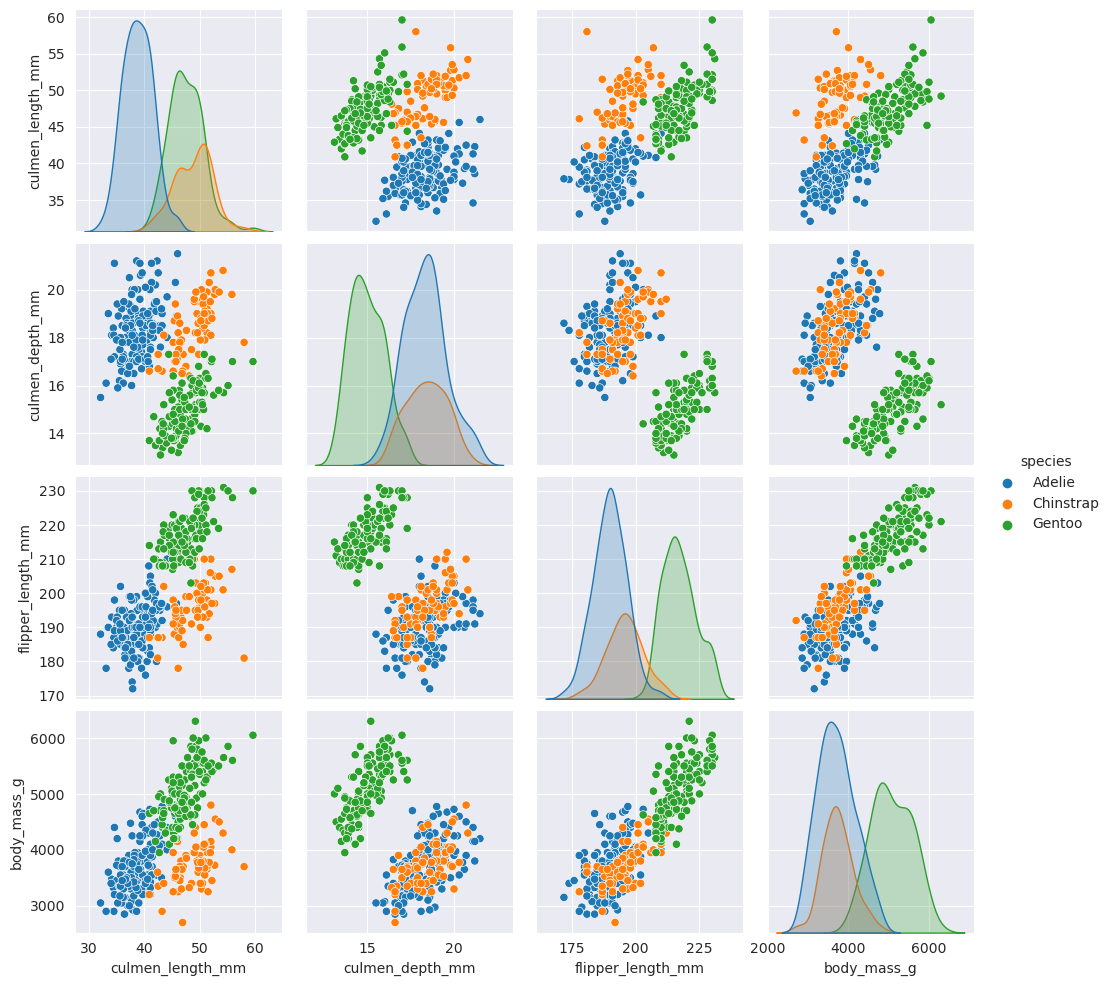

In [23]:
sns.pairplot(penguins, hue="species")
plt.show()

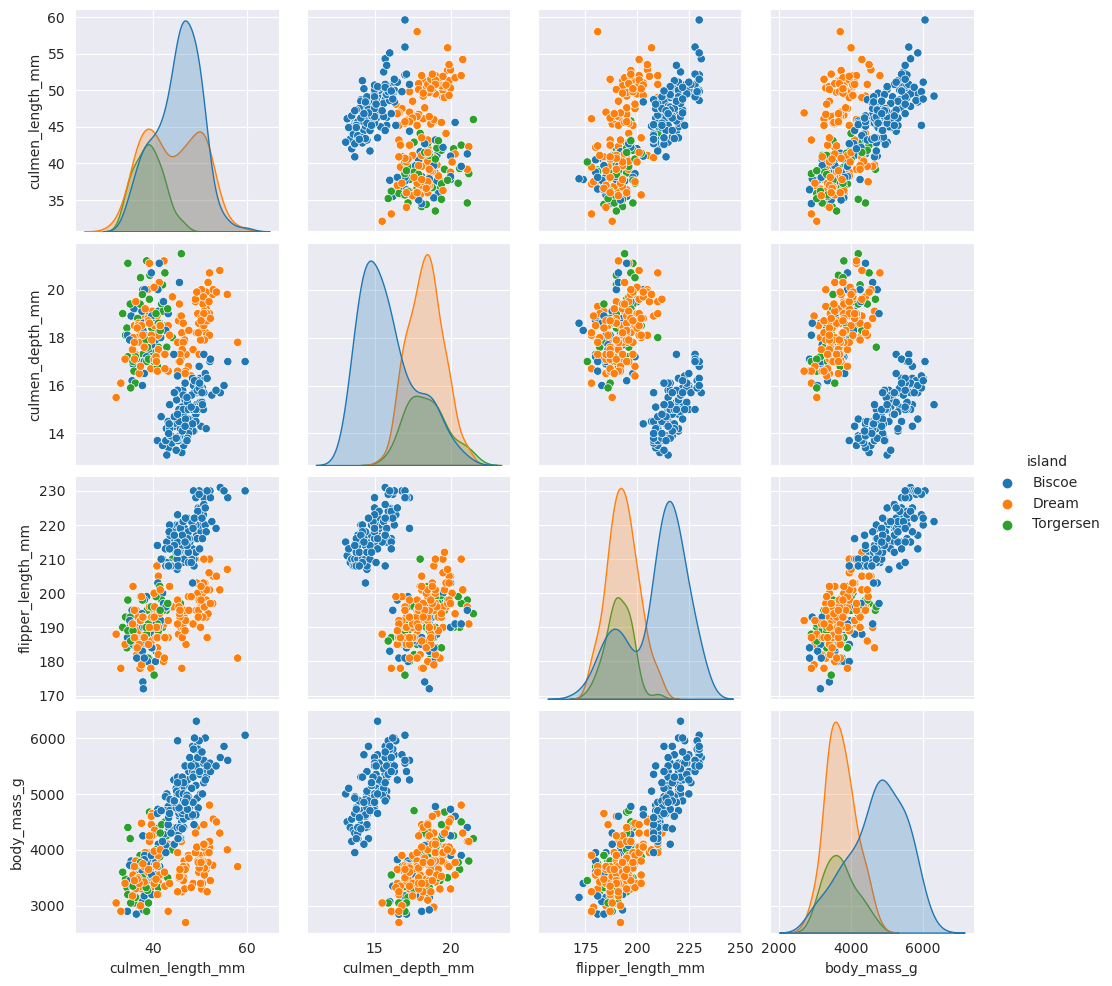

In [24]:
sns.pairplot(penguins, hue="island")
plt.show()

In [ ]:
penguins_nan = penguins.dropna().copy()
colors = penguins_na[['species', 'sex', 'island']].apply(tuple, axis=1)
penguins_na['colors'] = colors
penguins_na.head()

In [ ]:
sns.pairplot(penguins_na, hue='colors')
plt.show()

## California dataset

### Cargamos del dataset

In [ ]:
# Cargamos el dataset
california_housing = fetch_california_housing()

In [ ]:
# diabetes es un objeto tipo diccionario
california_housing.keys()

In [ ]:
# Item de descripción
print(california_housing.DESCR)

In [ ]:
# Nombres de las features o variables predictoras
atributos = california_housing.feature_names
print(atributos)

In [ ]:
# Extraemos los numpy arrays
X = california_housing.data 
y = california_housing.target

### Análisis exploratorio

In [ ]:
# Convertimos a pandas dataframe 
california = pd.DataFrame(data=X, columns=california_housing.feature_names)
california['target'] = pd.Series(y, dtype='float')

In [ ]:
# Número de filas y columnas en el data frame
california.shape

In [ ]:
# Visualización
california.head()

In [ ]:
california.info()

In [ ]:
california.describe()

#### Dependencia espacial

In [ ]:
sns.scatterplot(data=california,
                x="Longitude",
                y="Latitude",
                size="target",
                hue="target",
                palette="viridis",
                alpha=0.5)
plt.legend(title="MedHouseVal",
           bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
plt.title("Median house value en función de\n la ubicación espacial")
plt.show()

#### (Opcional) Scatterplot sobre mapa geográfico

In [ ]:
# Obtenemos el centro del mapa
centerlat = (california['Latitude'].max() + california['Latitude'].min()) / 2
centerlong = (california['Longitude'].max() + california['Longitude'].min()) / 2

center = centerlat, centerlong

# Creamos el mapa
m = folium.Map(location=center, zoom_start=5)

# agregamos punto para cada observación
for i in range(len(california)):
    folium.Circle(
        location=[california.iloc[i]['Latitude'], california.iloc[i]['Longitude']],
        radius=10,
    ).add_to(m)

# Mostramos el mapa en consola
m

In [ ]:
# Creamos un LinearColorMap
# El colormap es verde para 0 y rojo para 5
colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=0, vmax=5)

# Creamos un mapa, esta vez con un tile style
m = folium.Map(location=center, zoom_start=5, tiles='Stamen Toner')

# Agregamos las observaciones
# Esta vez con color según el valor
for i in range(len(california)):
    folium.Circle(
        location=[california.iloc[i]['Latitude'], california.iloc[i]['Longitude']],
        radius=10,
        fill=True,
        color=colormap(california.iloc[i]['target']),
        fill_opacity=0.2
    ).add_to(m)

# agregamos la escala de colores
m.add_child(colormap)

# Mostramos el mapa
m

In [ ]:
# creamos el mapa
m = folium.Map(location=center, zoom_start=5)

# ploteamos el heatmap
HeatMap(data=california[['Latitude',
                         'Longitude',
                         'target']].groupby(['Latitude',
                                             'Longitude']).sum().reset_index().values.tolist(),
        radius=8,
        max_zoom=13).add_to(m)

# mostramos el mapa
m

#### Análisis univariado

In [ ]:
plt.figure(figsize=(5,1))
sns.boxplot(x='target', data=california)
plt.show()

In [ ]:
sns.kdeplot(x='target', data=california, fill=True)
plt.axvline(x=california['target'].mean(), linestyle='dashed',label='Media')
plt.axvline(x=california['target'].median(), linestyle='dashed', color='red',label='Mediana')
plt.legend()
plt.show()

In [ ]:
#Boxplots
fig, axes = plt.subplots(len(atributos),1,figsize=(5,10))

for i, atributo in enumerate(atributos):
    ax = sns.boxplot(x=atributo, ax=axes[i], data=california)
    ax.set_xlabel(atributo)
    
plt.tight_layout()
plt.show()

In [ ]:
# Outliers
Q1 = california.quantile(0.25)
Q3 = california.quantile(0.75)
IQR = Q3 - Q1

((california < (Q1 - 1.5 * IQR)) | (california > (Q3 + 1.5 * IQR))).sum()*100/len(california)

In [ ]:
# Densidades
fig, axes = plt.subplots(len(atributos),1,figsize=(5,20))

for i, atributo in enumerate(atributos):
    ax = sns.kdeplot(x=atributo, ax=axes[i], data=california, fill=True)
    ax.set_xlim((Q1 - 1.5 * IQR)[atributo],(Q3 + 1.5 * IQR)[atributo])
    ax.set_xlabel(atributo)
    ax.axvline(x=california[atributo].mean(), linestyle='dashed',label='Media')
    ax.axvline(x=california[atributo].median(), linestyle='dashed', color='red',label='Mediana')
    ax.legend()
    
plt.tight_layout()
plt.show()

#### Análisis multivariado

In [ ]:
corr = california.corr()
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f')
plt.show()

In [ ]:
sns.scatterplot(data=california,
              x='MedInc',
              y='target'
             )
plt.show()

In [ ]:
sns.jointplot(data=california,
              x='MedInc',
              y='target',
              kind="kde",
              fill=True
             )
plt.show()